In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [7]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns = iris.feature_names)
y = pd.DataFrame(iris.target, columns = ['target'])

In [8]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 123)

In [10]:
model = GaussianNB() #BernoulliNB, MultinomialNB
model.fit(train_X, train_y)

C:\Users\leeyubin\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [11]:
model.predict(test_X)[:1]

array([1])

In [12]:
model.predict_proba(test_X)[:1]

array([[7.24143720e-126, 9.23061979e-001, 7.69380215e-002]])

In [13]:
# Xdata 첫번째 행
predict_data = np.array(test_X.iloc[0])
predict_data

array([6.3, 2.5, 4.9, 1.5])

In [14]:
# Class별 평균, 분산
for i in range(3):
    print(model.theta_[i], model.sigma_[i])

[5.01621622 3.43243243 1.46756757 0.25945946] [0.10568298 0.14975895 0.02705625 0.01214025]
[5.95       2.78409091 4.24090909 1.32272727] [0.27068182 0.10042872 0.22741736 0.04221075]
[6.58717949 2.95897436 5.57948718 2.02820513] [0.39752795 0.11011177 0.29188692 0.0774096 ]


In [15]:
import scipy as sp
# Class별 likelihood(우도)
likelihood = [
(sp.stats.norm.pdf(predict_data[0], model.theta_[0][0], np.sqrt(model.sigma_[0][0])) *
 sp.stats.norm.pdf(predict_data[1], model.theta_[0][1], np.sqrt(model.sigma_[0][1])) *
 sp.stats.norm.pdf(predict_data[2], model.theta_[0][2], np.sqrt(model.sigma_[0][2])) *
 sp.stats.norm.pdf(predict_data[3], model.theta_[0][3], np.sqrt(model.sigma_[0][3]))),
(sp.stats.norm.pdf(predict_data[0], model.theta_[1][0], np.sqrt(model.sigma_[1][0])) *
 sp.stats.norm.pdf(predict_data[1], model.theta_[1][1], np.sqrt(model.sigma_[1][1])) *
 sp.stats.norm.pdf(predict_data[2], model.theta_[1][2], np.sqrt(model.sigma_[1][2])) *
 sp.stats.norm.pdf(predict_data[3], model.theta_[1][3], np.sqrt(model.sigma_[1][3]))),
(sp.stats.norm.pdf(predict_data[0], model.theta_[2][0], np.sqrt(model.sigma_[0][0])) *
 sp.stats.norm.pdf(predict_data[1], model.theta_[2][1], np.sqrt(model.sigma_[0][1])) *
 sp.stats.norm.pdf(predict_data[2], model.theta_[2][2], np.sqrt(model.sigma_[0][2])) *
 sp.stats.norm.pdf(predict_data[3], model.theta_[2][3], np.sqrt(model.sigma_[0][3])))]
likelihood

[2.0700298536453225e-126, 0.2218869448618605, 7.497361843154609e-09]

In [16]:
# likehood * prior = posterior
posterior = likelihood * model.class_prior_
posterior

array([6.38259205e-127, 8.13585464e-002, 2.43664260e-009])

In [17]:
# 비교
print(model.predict_proba(test_X)[:1])
print(posterior / np.sum(posterior, axis = 0))

[[7.24143720e-126 9.23061979e-001 7.69380215e-002]]
[7.84501707e-126 9.99999970e-001 2.99494353e-008]


In [18]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples = 35, n_features = 2,
                          n_informative = 2, n_redundant = 0,
                          random_state = 0)
clf = GaussianNB().fit(X, y)

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, clf.predict_proba(X)[:, 1])
fpr, tpr, thresholds

(array([0.        , 0.        , 0.        , 0.05555556, 0.05555556,
        0.27777778, 0.27777778, 0.5       , 0.5       , 0.72222222,
        0.72222222, 1.        ]),
 array([0.        , 0.05882353, 0.29411765, 0.29411765, 0.82352941,
        0.82352941, 0.88235294, 0.88235294, 0.94117647, 0.94117647,
        1.        , 1.        ]),
 array([1.95069196e+00, 9.50691963e-01, 8.59568381e-01, 8.02528529e-01,
        6.36588785e-01, 5.72423389e-01, 5.09315146e-01, 2.18899703e-01,
        2.07759389e-01, 1.38131811e-01, 1.12737670e-01, 1.95386725e-05]))

In [20]:
# AUC
from sklearn.metrics import auc
auc(fpr, tpr)

0.8823529411764706

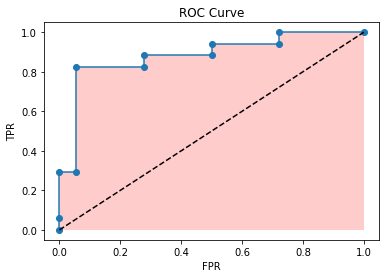

In [21]:
plt.plot(fpr, tpr, 'o-')
plt.plot([0,1],[0,1], 'k--', label = 'random')
plt.fill_between(fpr, tpr, 0, facecolor = 'red', alpha = 0.2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()